# Minicurso Classificadores

## Lição 1: Meu primeiro classificador - para valer...

### Reconhecendo números de 0 a 9 escritos a mão

#### Importando dependências e setup

In [1]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Import Numeric library
import numpy as np

# Import plotting library
import matplotlib.pyplot as plt

# Import 3D plotting library
from mpl_toolkits.mplot3d import Axes3D

# Set plot to be show inside the notebook
%matplotlib inline

# Other imports
from pprint import pprint

#### Obtendo os dados

In [2]:
# The digits dataset
digits = datasets.load_digits()
pprint(digits)

{'DESCR': '.. _digits_dataset:\n'
          '\n'
          'Optical recognition of handwritten digits dataset\n'
          '--------------------------------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 5620\n'
          '    :Number of Attributes: 64\n'
          '    :Attribute Information: 8x8 image of integer pixels in the '
          'range 0..16.\n'
          '    :Missing Attribute Values: None\n'
          "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n"
          '    :Date: July; 1998\n'
          '\n'
          'This is a copy of the test set of the UCI ML hand-written digits '
          'datasets\n'
          'http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n'
          '\n'
          'The data set contains images of hand-written digits: 10 classes '
          'where\n'
          'each class refers to a digit.\n'
          '\n'
          'Preprocess

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [5]:
# Verifing the number of samples
len(digits['data'])

1797

In [6]:
# Verifing the number of sample images
len(digits.images)

1797

In [7]:
# View the 1st sample
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
# Verifing the number of dimensions
len(digits['data'][0])

64

In [9]:
# View the 1st sample image
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
# View the labels (classes)
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
# Knowing the labels (classes) names
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

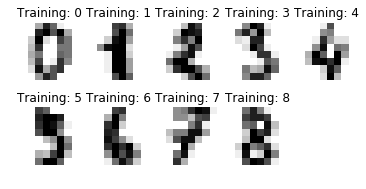

In [12]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 9 images, stored in the `images` attribute of the
# dataset. (If we were working from image files, we could load them using
# matplotlib.pyplot.imread.)
# Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:9]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.subplots_adjust(top = 1.25)
    plt.title('Training: %i' % label)

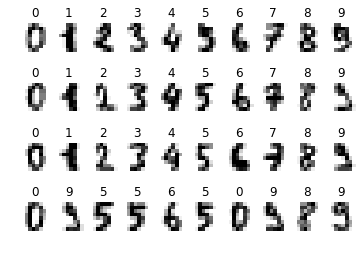

In [13]:
# Let's take a look at the first 40 images, to compare different hand writings
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(8, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.subplots_adjust(top = 1.75)
    plt.title('%i' % label)

#### Tratando os Dados

Poderiamos utilizar os dados em `digits['data']` mas vamos simular que só temos as imagens e manipular seus pixels para ajusta-los à nossa solução de aprendizado de máquina.

In [14]:
# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)

X = digits.images.reshape((n_samples, -1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

#### Explorando os Dados

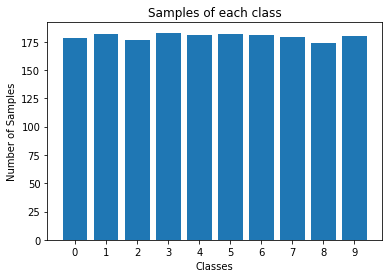

In [16]:
labels_counts = np.unique(y, return_counts=True)

plt.bar(labels_counts[0], labels_counts[1]);

plt.title('Samples of each class');
plt.xticks(labels_counts[0]);
plt.xlabel('Classes');
plt.ylabel('Number of Samples');

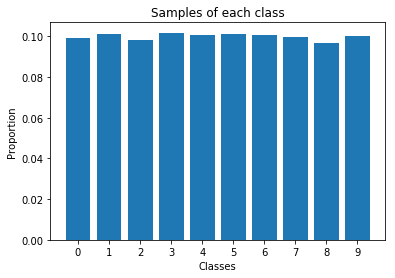

In [17]:
plt.bar(labels_counts[0], labels_counts[1]/len(y));

plt.title('Samples of each class');
plt.xticks(labels_counts[0]);
plt.xlabel('Classes');
plt.ylabel('Proportion');

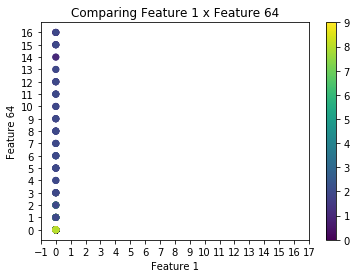

In [18]:
# Compare some features (e.g.: 0, 63, 37, 40).
# Also compare a feature with itself. What will happen?
i = 0
j = 63

plt.scatter(X[:,i], X[:,j], c=y);

plt.colorbar();
plt.xlabel(f'Feature {i+1}');
plt.xticks(range(-1, 18));
plt.ylabel(f'Feature {j+1}');
plt.yticks(range(17));
plt.title(f'Comparing Feature {i+1} x Feature {j+1}');

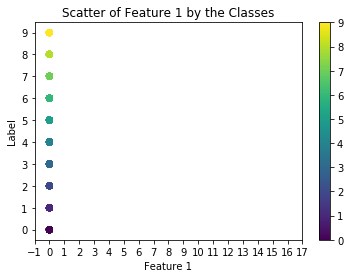

In [19]:
# Test features 0 (first), 63 (last) and others..
i = 0

plt.scatter(X[:,i], y, c=y);

plt.colorbar();
plt.xlabel(f'Feature {i+1}');
plt.xticks(range(-1, 18));
plt.ylabel('Label');
plt.yticks(range(10));
plt.title(f'Scatter of Feature {i+1} by the Classes');

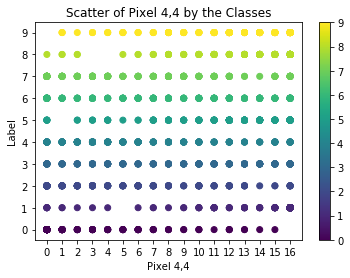

In [20]:
# Test middle pixels: 3,3 ; 4,4; 3,4; 4,3
# Also compare the pixels 0,0 (first), 7,7 (last), withe the above plot.
r,c = 3,3
i = r*8 + c

plt.scatter(X[:,i], y, c=y);

plt.colorbar();
plt.xlabel(f'Pixel {r+1},{c+1}');
plt.xticks(range(17));
plt.ylabel('Label');
plt.yticks(range(10));
plt.title(f'Scatter of Pixel {r+1},{c+1} by the Classes');

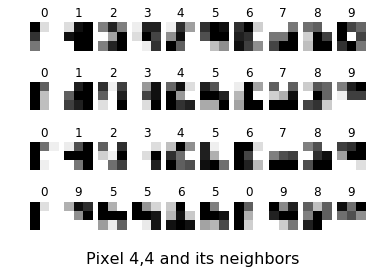

In [21]:
if r==0:
    r_min, r_max = r, r+2
elif r==7:
    r_min, r_max = r-2, r
else:
    r_min, r_max = r-1, r+2
    
if c==0:
    c_min, c_max = c, c+2
elif c==7:
    c_min, c_max = c-2, c
else:
    c_min, c_max = c-1, c+2
    
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(8, 10, index + 1);
    plt.axis('off');
    img = image[r_min:r_max, c_min:c_max]
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest');
    plt.subplots_adjust(top = 1.75);
    plt.title('%i' % label);
plt.suptitle(f'\nPixel {r+1},{c+1} and its neighbors', size=16);

Vamos resumir os dados para conseguir visualiza-los. (Não se preocupe, por agora agora, em como resumimos, apenas analise a dispersão das amostras)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
Score = pca.fit_transform(X)

ex_var_ratio = pca.explained_variance_ratio_*100
ex_var_ratio = list(map(int, map(round, ex_var_ratio)))

pc1 = Score.reshape((n_samples, -2))[:,0]
pc2 = Score.reshape((n_samples, -2))[:,1]
pc3 = Score.reshape((n_samples, -2))[:,2]

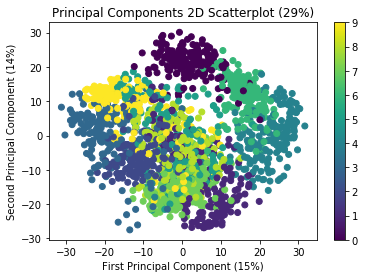

In [23]:
plt.scatter(pc1, pc2, c=y);

plt.colorbar();
plt.xlabel('First Principal Component ({}%)'.format(ex_var_ratio[0]));
plt.ylabel('Second Principal Component ({}%)'.format(ex_var_ratio[1]));
plt.title('Principal Components 2D Scatterplot ({}%)'.format(sum(ex_var_ratio[0:2])));

In [24]:
# Allow interactive plots
%matplotlib notebook
%matplotlib widget

<IPython.core.display.Javascript object>


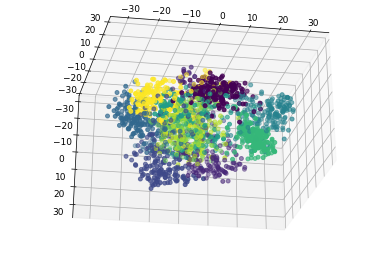

In [25]:
fig = plt.figure()
ax = Axes3D(fig)

plot = ax.scatter(pc1, pc2, pc3, c=y);

#plt.colorbar(plot);
#ax.set_xlabel('PC 1 ({}%)'.format(ex_var_ratio[0]));
#ax.set_ylabel('PC 2 ({}%)'.format(ex_var_ratio[1]));
#ax.set_zlabel('PC 3 ({}%)'.format(ex_var_ratio[2]));
#plt.title('Principal Components 3D Scatterplot ({}%)'.format(sum(ex_var_ratio)));

plt.show() #Or: plt.gcf().canvas.draw()

In [26]:
# Close interactive plot
plt.close()

# Disable interactive plot reseting plot to be show inside the notebook (statically)
%matplotlib inline

#### Treinando o Classificador

In [27]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
Xtrain = X[:n_samples // 2]
ytrain = y[:n_samples // 2]

classifier.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Prevendo

In [28]:
# Now predict the value of the digit on the second half:
Xtest = X[n_samples // 2:]
ytest = y[n_samples // 2:]

expected = ytest
predicted = classifier.predict(Xtest)

In [29]:
conf_matrix = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % conf_matrix)

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


In [30]:
n_test_samples = conf_matrix.sum()

n_corrects = conf_matrix[np.eye(conf_matrix.shape[0],dtype=bool)].sum()
accuracy = round(n_corrects*100/n_test_samples,1)
print(f'Corrects: {n_corrects} ({accuracy}%)')

n_erros = conf_matrix[~np.eye(conf_matrix.shape[0],dtype=bool)].sum()
neg_accuracy = round(n_erros*100/n_test_samples,1)
print(f'Erros: {n_erros} ({neg_accuracy}%)')

Corrects: 871 (96.9%)
Erros: 28 (3.1%)


In [31]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

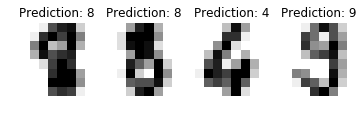

In [32]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

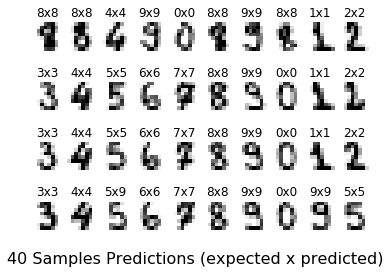

In [33]:
imgs_labels_preds = list(zip(digits.images[n_samples // 2:], expected, predicted))

i = 40
for index, (image, label, prediction) in enumerate(imgs_labels_preds[:i]):
    plt.subplot(8, 10, index + 1);
    plt.axis('off');
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest');
    plt.subplots_adjust(top = 1.75);
    plt.title('{}x{}'.format(label, prediction));
    
plt.suptitle(f'\n{i} Samples Predictions (expected x predicted)', size=16);
plt.show();

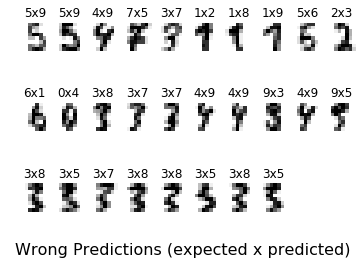

In [34]:
erros_idx = np.argwhere((expected == predicted) == False)[:,0]

wrong_imgs_labels_preds = np.array(imgs_labels_preds)[erros_idx]

n_subplot_rows = 2*((len(erros_idx)//10)+1)
for index, (image, label, prediction) in enumerate(wrong_imgs_labels_preds):
    plt.subplot(n_subplot_rows, 10, index + 1);
    plt.axis('off');
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest');
    plt.subplots_adjust(top = 1.75);
    plt.title('{}x{}'.format(label, prediction));
    
plt.suptitle(f'\nWrong Predictions (expected x predicted)', size=16);
plt.show();



# Parabéns!! Você criou seu primeiro código de IA (com uma metodologia)!!




---

### Para saber mais...

Dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

Outros datasets para treinar:
https://scikit-learn.org/stable/datasets/index.html

Dica para gráficos interativos no notebook: https://www.reddit.com/r/IPython/comments/47tct0/stop_interaction_in_jupyter_plot_programmatically/

Métricas de classificação: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Tutorial que usei de base para esta lição:
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

### Dicas de execução

Uma forma bem simples de executar este Notebook é usando o Google Colab: https://colab.research.google.com/

Se for utilizar sua máquina, lembre de intalar o Python 3 (eu usei o 3.7) e as dependências:
- NumPy
- Scikit-learn
- Jupyter Notebook
- Matplotlib

Sugiro instalar tanto o python quanto as dependências via [Anaconda](https://www.anaconda.com/distribution/#download-section) (ou [MiniConda](https://conda.io/en/latest/miniconda.html)) criando um Environment.